# **캐글 필사**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None

In [2]:
import zipfile
import os

# 압축 파일 경로
zip_files = [
    "/kaggle/input/instacart-market-basket-analysis/aisles.csv.zip",
    "/kaggle/input/instacart-market-basket-analysis/departments.csv.zip",
    "/kaggle/input/instacart-market-basket-analysis/order_products__prior.csv.zip",
    "/kaggle/input/instacart-market-basket-analysis/order_products__train.csv.zip",
    "/kaggle/input/instacart-market-basket-analysis/orders.csv.zip",
    "/kaggle/input/instacart-market-basket-analysis/products.csv.zip",
    "/kaggle/input/instacart-market-basket-analysis/sample_submission.csv.zip"
]

# 압축 해제할 디렉토리
output_dir = "/kaggle/working/"

# 압축 해제
for zip_file in zip_files:
    with zipfile.ZipFile(zip_file, 'r') as z:
        z.extractall(output_dir)
        
    # 압축 해제 후 파일명 변경
    for file_name in z.namelist():
        original_file = os.path.join(output_dir, file_name)
        new_file = os.path.join(output_dir, file_name.replace('.zip', ''))
        os.rename(original_file, new_file)

# 압축 해제된 파일 목록 확인
extracted_files = os.listdir(output_dir)
print(extracted_files)

from subprocess import check_output

# 디렉토리 경로 설정
directory = "/kaggle/working/"

# 디렉토리의 파일 목록 출력
print(check_output(["ls", directory]).decode("utf8"))

['order_products__train.csv', 'aisles.csv', 'order_products__prior.csv', 'orders.csv', '.virtual_documents', 'products.csv', 'departments.csv', '__MACOSX', 'sample_submission.csv']
__MACOSX
aisles.csv
departments.csv
order_products__prior.csv
order_products__train.csv
orders.csv
products.csv
sample_submission.csv



In [3]:
order_products_train_df = pd.read_csv("/kaggle/working/order_products__train.csv")
order_products_prior_df = pd.read_csv("/kaggle/working/order_products__prior.csv")
orders_df = pd.read_csv("/kaggle/working/orders.csv")
products_df = pd.read_csv("/kaggle/working/products.csv")
aisles_df = pd.read_csv("/kaggle/working/aisles.csv")
departments_df = pd.read_csv("/kaggle/working/departments.csv")


In [4]:
orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [5]:
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [6]:
order_products_train_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


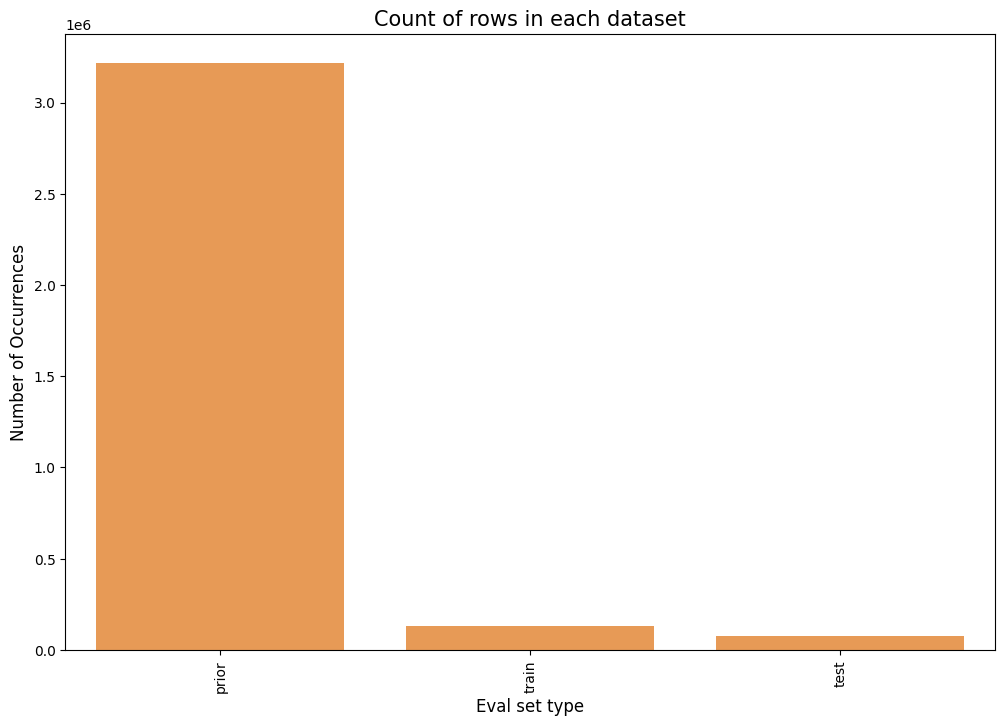

In [7]:
cnt_srs = orders_df.eval_set.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Eval set type', fontsize=12)
plt.title('Count of rows in each dataset', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

In [8]:
def get_unique_count(x):
    return len(np.unique(x))

cnt_srs = orders_df.groupby("eval_set")["user_id"].aggregate(get_unique_count)
cnt_srs

eval_set
prior    206209
test      75000
train    131209
Name: user_id, dtype: int64

/tmp/ipykernel_36/315416539.py:1: FutureWarning: The provided callable <function max at 0x7f7a9eb99510> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  cnt_srs = orders_df.groupby("user_id")["order_number"].aggregate(np.max).reset_index()


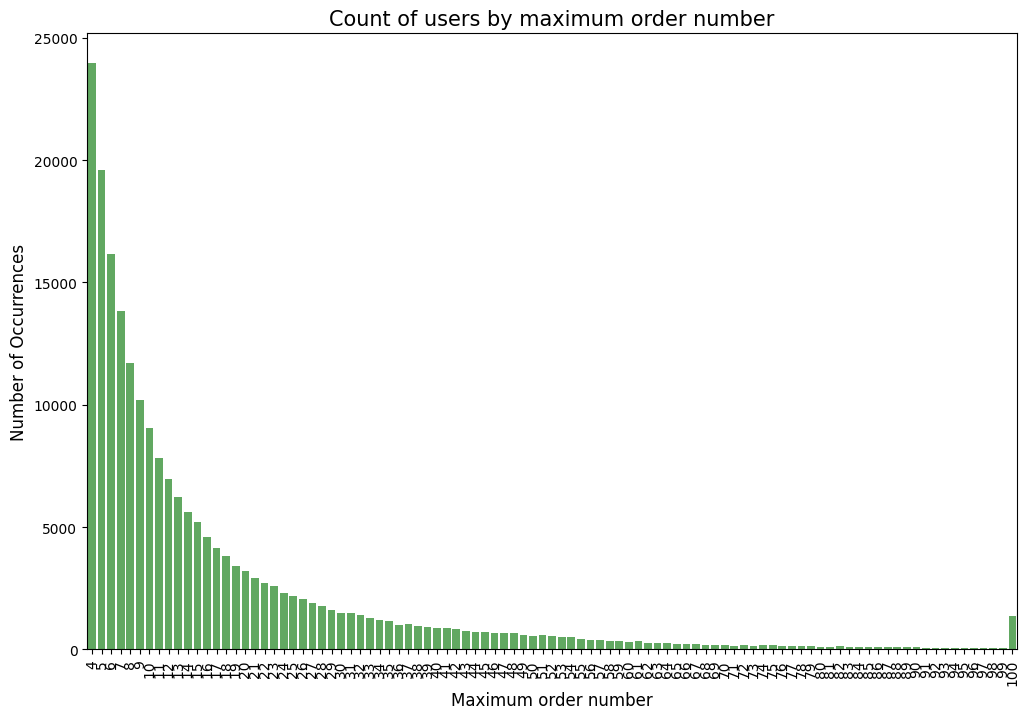

In [9]:
cnt_srs = orders_df.groupby("user_id")["order_number"].aggregate(np.max).reset_index()
cnt_srs = cnt_srs.order_number.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8, color=color[2])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Maximum order number', fontsize=12)
plt.title('Count of users by maximum order number', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

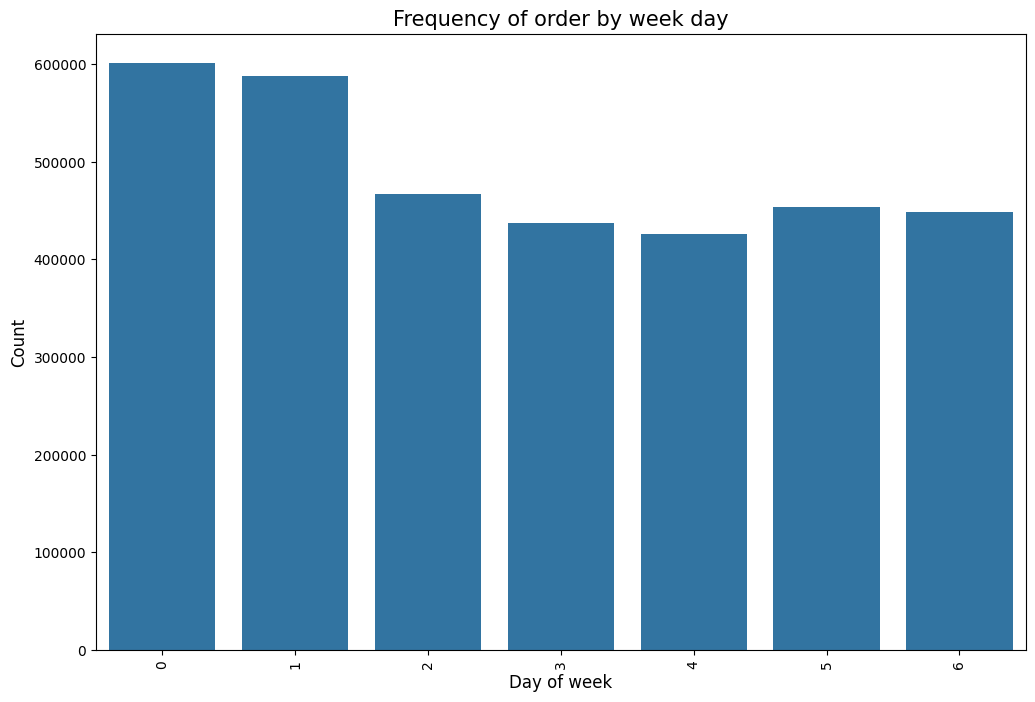

In [10]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_dow", data=orders_df, color=color[0])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by week day", fontsize=15)
plt.show()

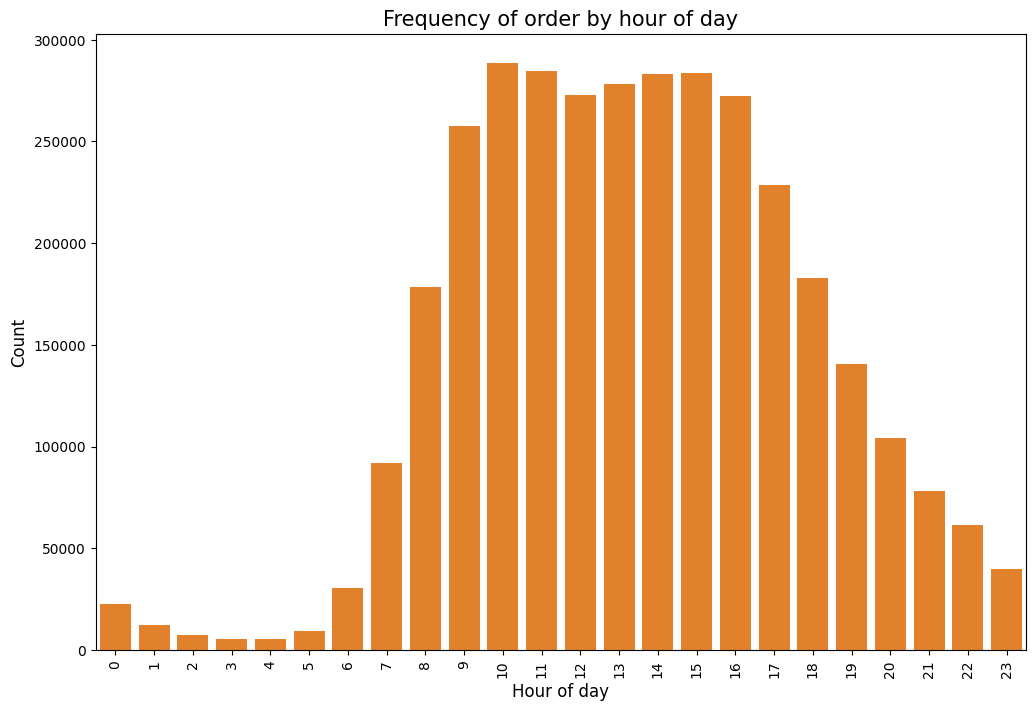

In [11]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_hour_of_day", data=orders_df, color=color[1])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by hour of day", fontsize=15)
plt.show()

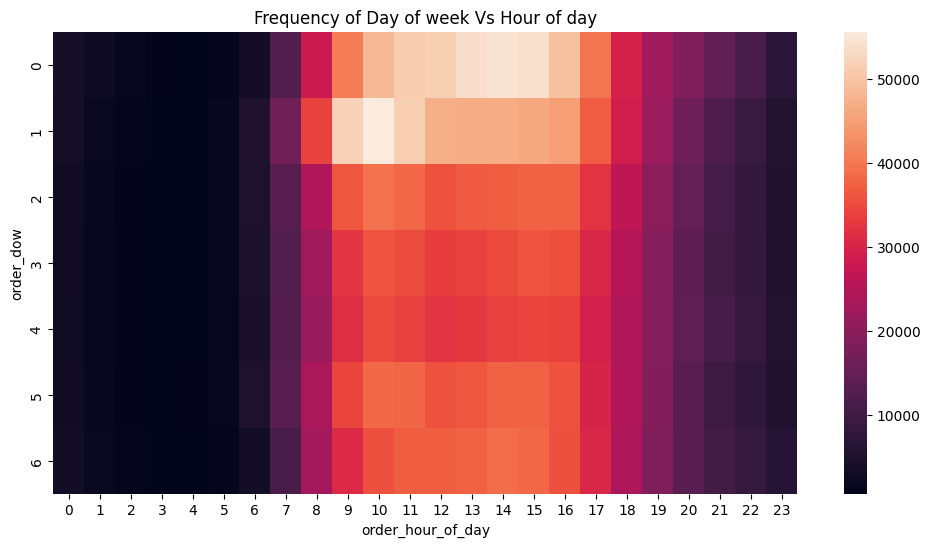

In [12]:
grouped_df = orders_df.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped_df = grouped_df.pivot(index = 'order_dow', columns = 'order_hour_of_day', values = 'order_number')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("Frequency of Day of week Vs Hour of day")
plt.show()

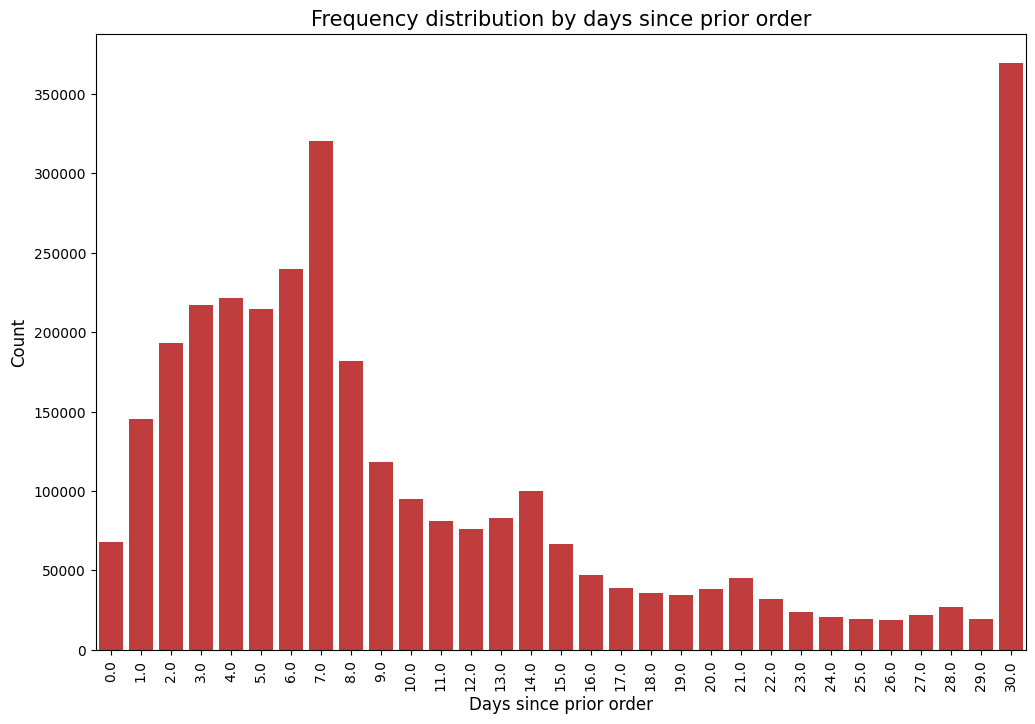

In [13]:
plt.figure(figsize=(12,8))
sns.countplot(x="days_since_prior_order", data=orders_df, color=color[3])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Days since prior order', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency distribution by days since prior order", fontsize=15)
plt.show()

In [14]:
# percentage of re-orders in prior set #
order_products_prior_df.reordered.sum() / order_products_prior_df.shape[0]

0.5896974667922161

In [15]:
# percentage of re-orders in train set #
order_products_train_df.reordered.sum() / order_products_train_df.shape[0]

0.5985944127509629

In [16]:
grouped_df = order_products_prior_df.groupby("order_id")["reordered"].aggregate("sum").reset_index()
grouped_df.loc[grouped_df["reordered"] > 1, "reordered"] = 1
grouped_df["reordered"].value_counts() / grouped_df.shape[0]

reordered
1    0.879151
0    0.120849
Name: count, dtype: float64

In [17]:
grouped_df = order_products_train_df.groupby("order_id")["reordered"].aggregate("sum").reset_index()
grouped_df.loc[grouped_df["reordered"] > 1, "reordered"] = 1
grouped_df["reordered"].value_counts() / grouped_df.shape[0]

reordered
1    0.93444
0    0.06556
Name: count, dtype: float64

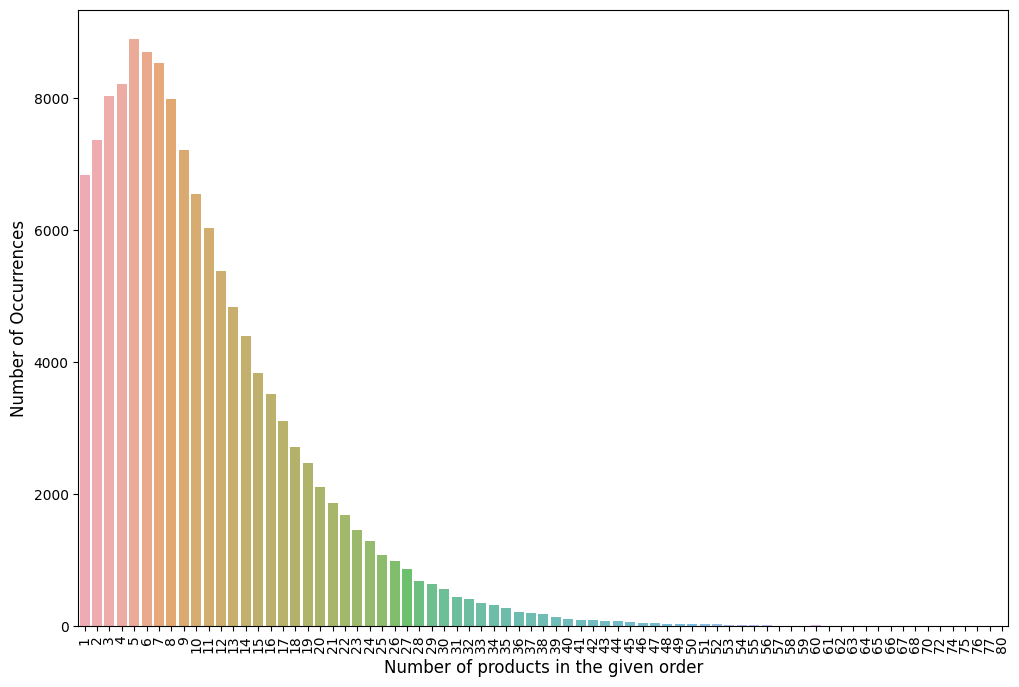

In [18]:
grouped_df = order_products_train_df.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
cnt_srs = grouped_df.add_to_cart_order.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(x = cnt_srs.index, y = cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of products in the given order', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [19]:
products_df.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [20]:
aisles_df.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [21]:
departments_df.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [22]:
order_products_prior_df = pd.merge(order_products_prior_df, products_df, on='product_id', how='left')
order_products_prior_df = pd.merge(order_products_prior_df, aisles_df, on='aisle_id', how='left')
order_products_prior_df = pd.merge(order_products_prior_df, departments_df, on='department_id', how='left')
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


In [23]:
cnt_srs = order_products_prior_df['product_name'].value_counts().reset_index().head(20)
cnt_srs.columns = ['product_name', 'frequency_count']
cnt_srs

,product_name,frequency_count
0,Banana,472565
1,Bag of Organic Bananas,379450
2,Organic Strawberries,264683
3,Organic Baby Spinach,241921
4,Organic Hass Avocado,213584
5,Organic Avocado,176815
6,Large Lemon,152657
7,Strawberries,142951
8,Limes,140627
9,Organic Whole Milk,137905


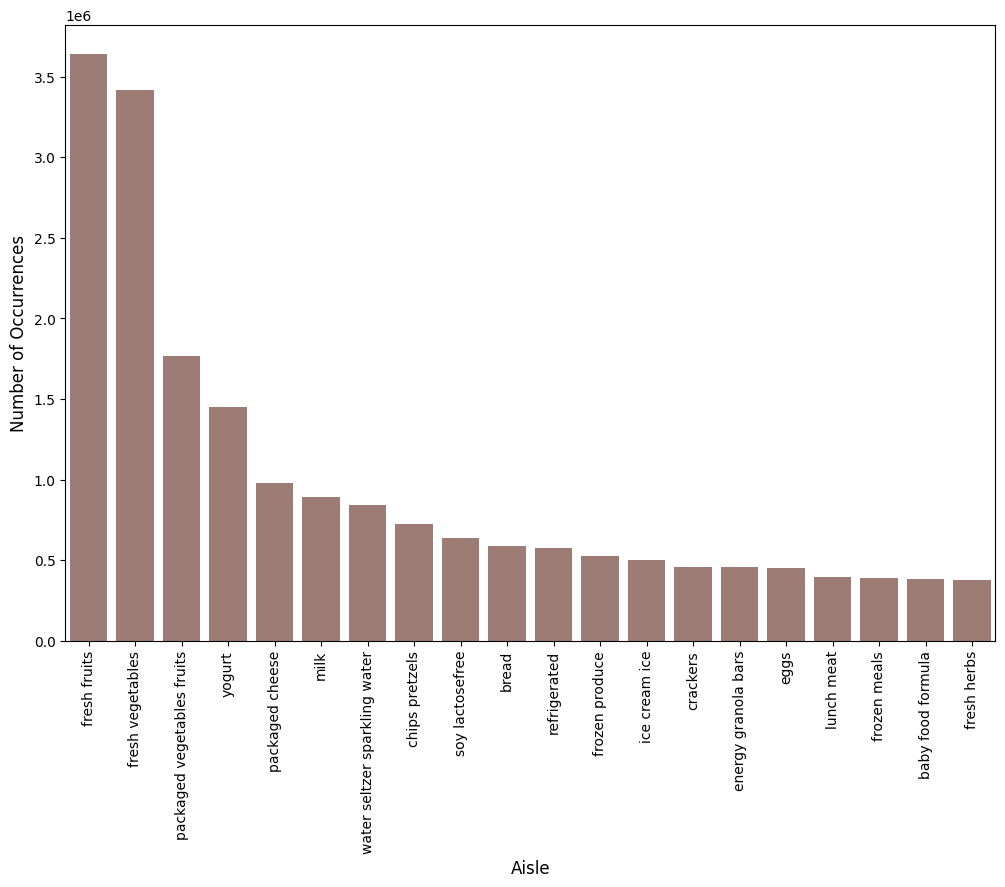

In [24]:
cnt_srs = order_products_prior_df['aisle'].value_counts().head(20)
plt.figure(figsize=(12,8))
sns.barplot(x = cnt_srs.index, y = cnt_srs.values, alpha=0.8, color=color[5])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Aisle', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

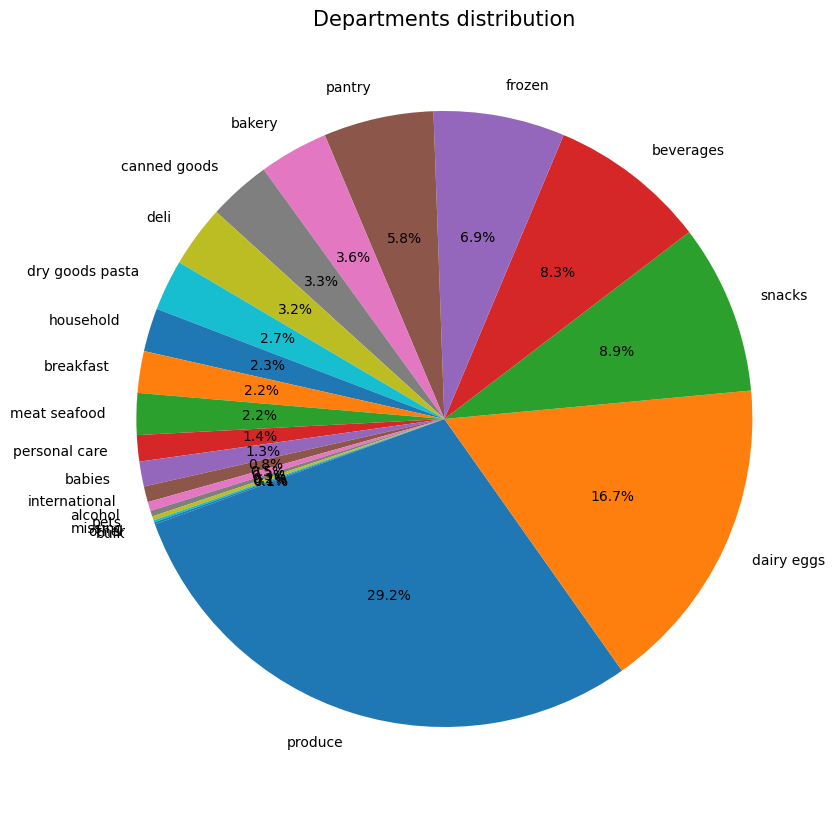

In [25]:
plt.figure(figsize=(10,10))
temp_series = order_products_prior_df['department'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', startangle=200)
plt.title("Departments distribution", fontsize=15)
plt.show()

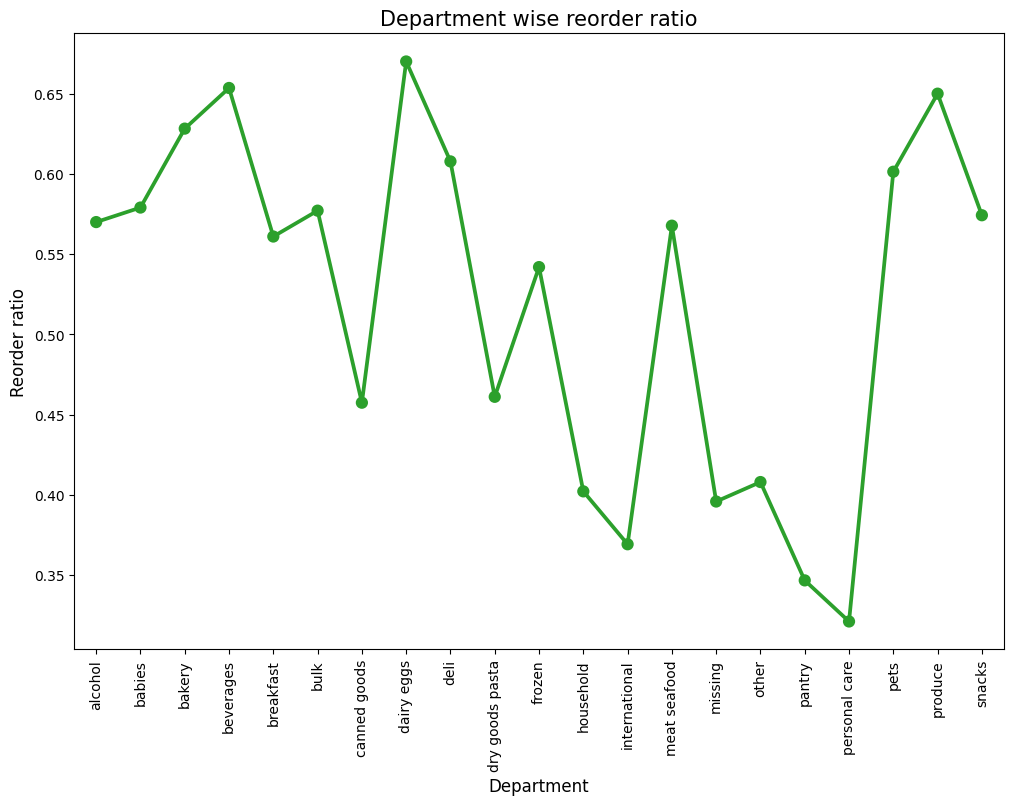

In [26]:
grouped_df = order_products_prior_df.groupby(["department"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(x='department', y='reordered', data=grouped_df, color=color[2])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.title("Department wise reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

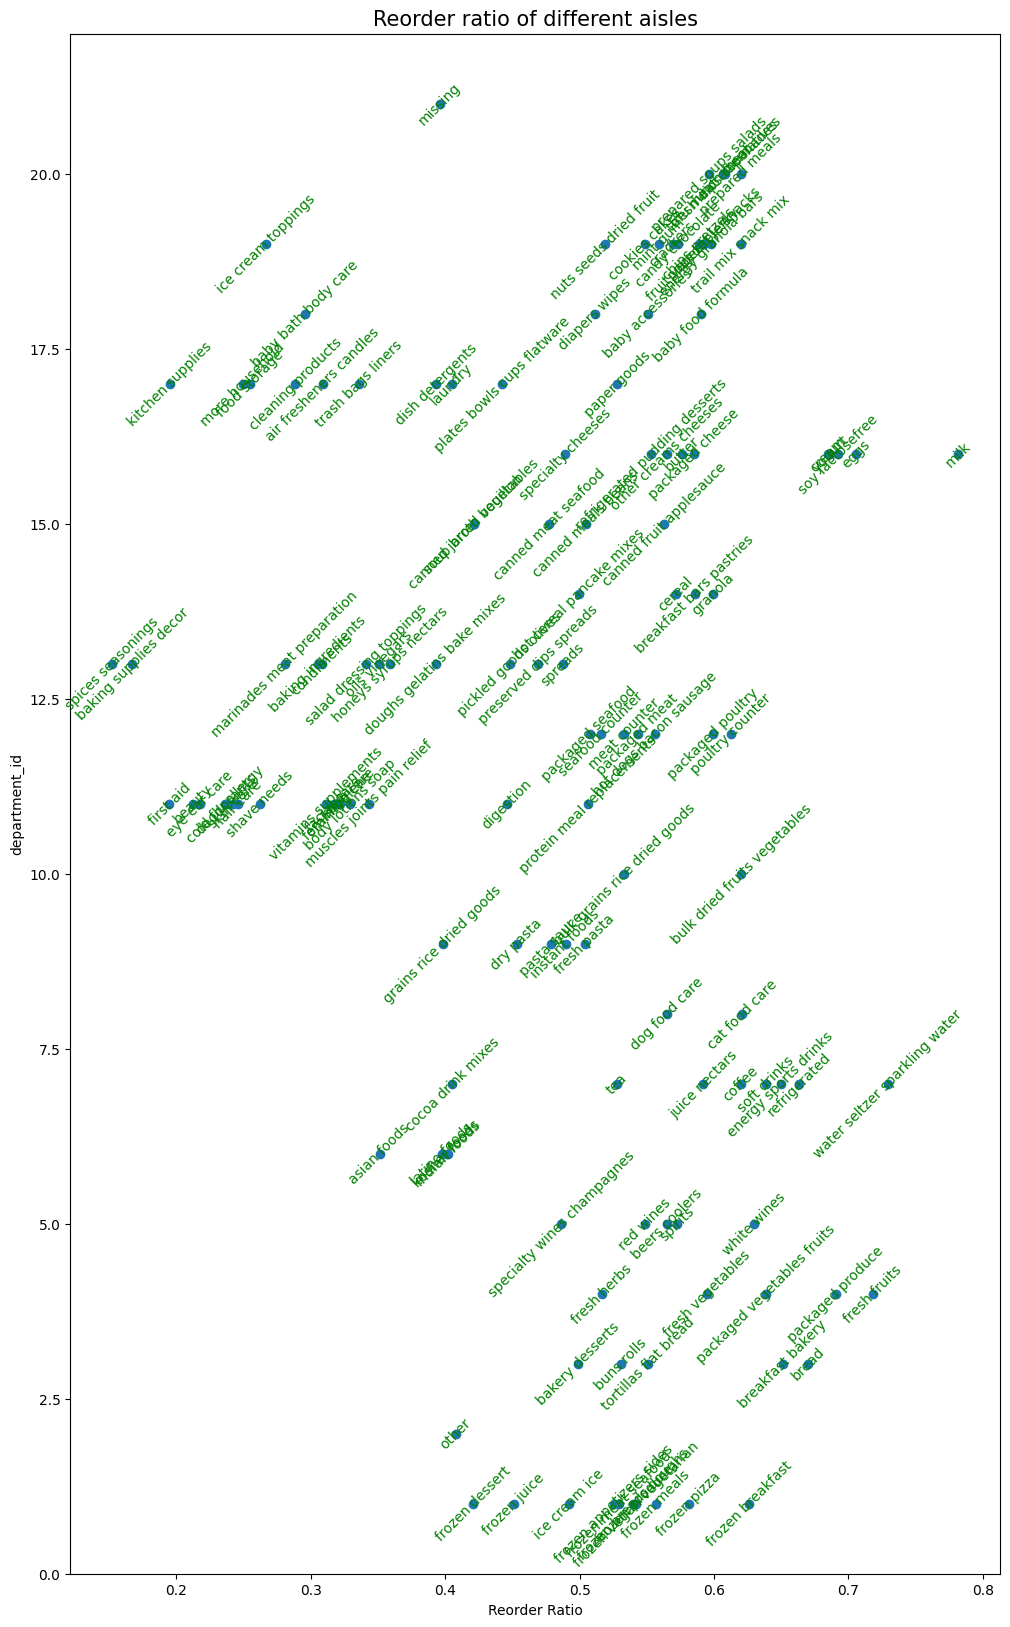

In [27]:
grouped_df = order_products_prior_df.groupby(["department_id", "aisle"])["reordered"].aggregate("mean").reset_index()

fig, ax = plt.subplots(figsize=(12,20))
ax.scatter(grouped_df.reordered.values, grouped_df.department_id.values)
for i, txt in enumerate(grouped_df.aisle.values):
    ax.annotate(txt, (grouped_df.reordered.values[i], grouped_df.department_id.values[i]), rotation=45, ha='center', va='center', color='green')
plt.xlabel('Reorder Ratio')
plt.ylabel('department_id')
plt.title("Reorder ratio of different aisles", fontsize=15)
plt.show()

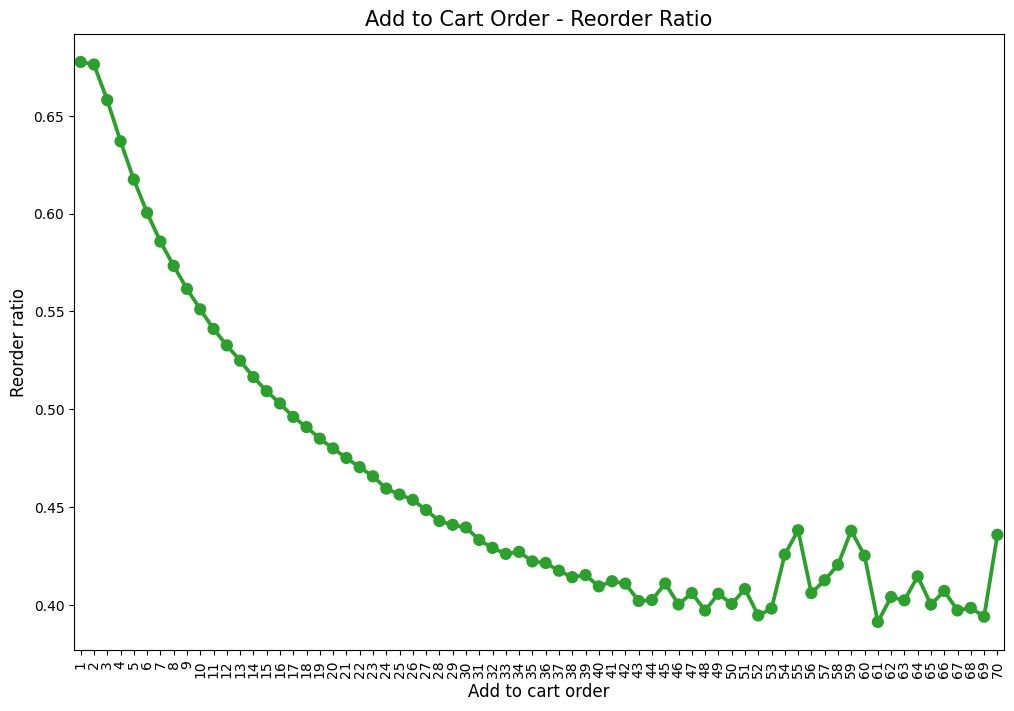

In [28]:
order_products_prior_df["add_to_cart_order_mod"] = order_products_prior_df["add_to_cart_order"].copy()
order_products_prior_df.loc[order_products_prior_df["add_to_cart_order_mod"] > 70, "add_to_cart_order_mod"] = 70
grouped_df = order_products_prior_df.groupby(["add_to_cart_order_mod"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(x='add_to_cart_order_mod', y='reordered', data=grouped_df, color=color[2])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Add to cart order', fontsize=12)
plt.title("Add to Cart Order - Reorder Ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

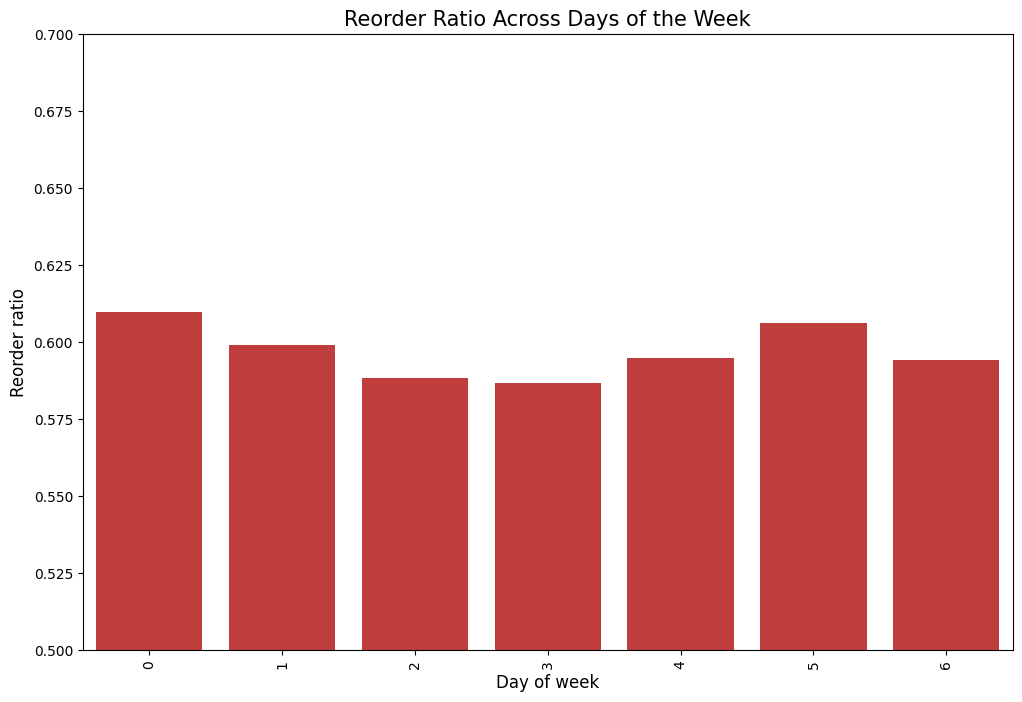

In [29]:
order_products_train_df = pd.merge(order_products_train_df, orders_df, on='order_id', how='left')
grouped_df = order_products_train_df.groupby(["order_dow"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.barplot(x='order_dow', y='reordered', data=grouped_df, color=color[3])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.title("Reorder Ratio Across Days of the Week", fontsize=15)
plt.xticks(rotation='vertical')
plt.ylim(0.5, 0.7)
plt.show()

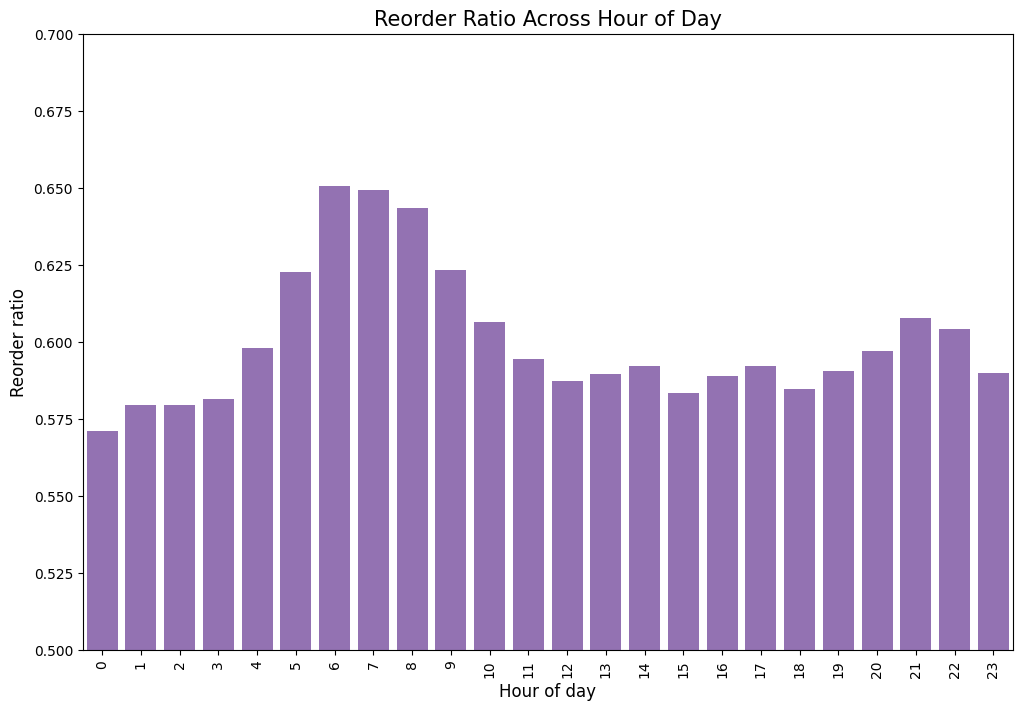

In [30]:
grouped_df = order_products_train_df.groupby(["order_hour_of_day"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.barplot(x='order_hour_of_day', y='reordered', data=grouped_df, color=color[4])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.title("Reorder Ratio Across Hour of Day", fontsize=15)
plt.xticks(rotation='vertical')
plt.ylim(0.5, 0.7)
plt.show()

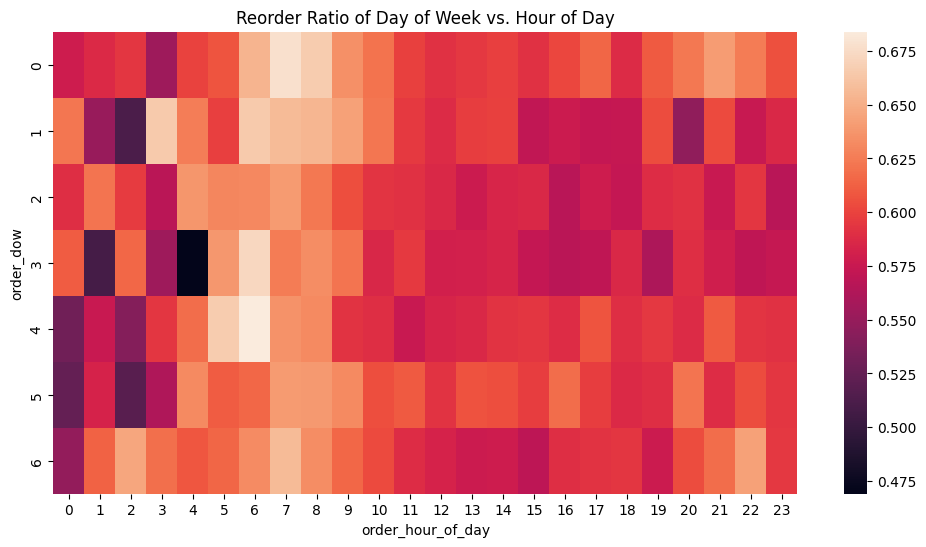

In [31]:
grouped_df = order_products_train_df.groupby(["order_dow", "order_hour_of_day"])["reordered"].aggregate("mean").reset_index()
grouped_df = grouped_df.pivot(index='order_dow', columns='order_hour_of_day', values='reordered')

plt.figure(figsize=(12, 6))
sns.heatmap(grouped_df)
plt.title("Reorder Ratio of Day of Week vs. Hour of Day")
plt.show()

# **새로운 시각화/전처리**

**: 주문량 상위 30개 상품 시각화**

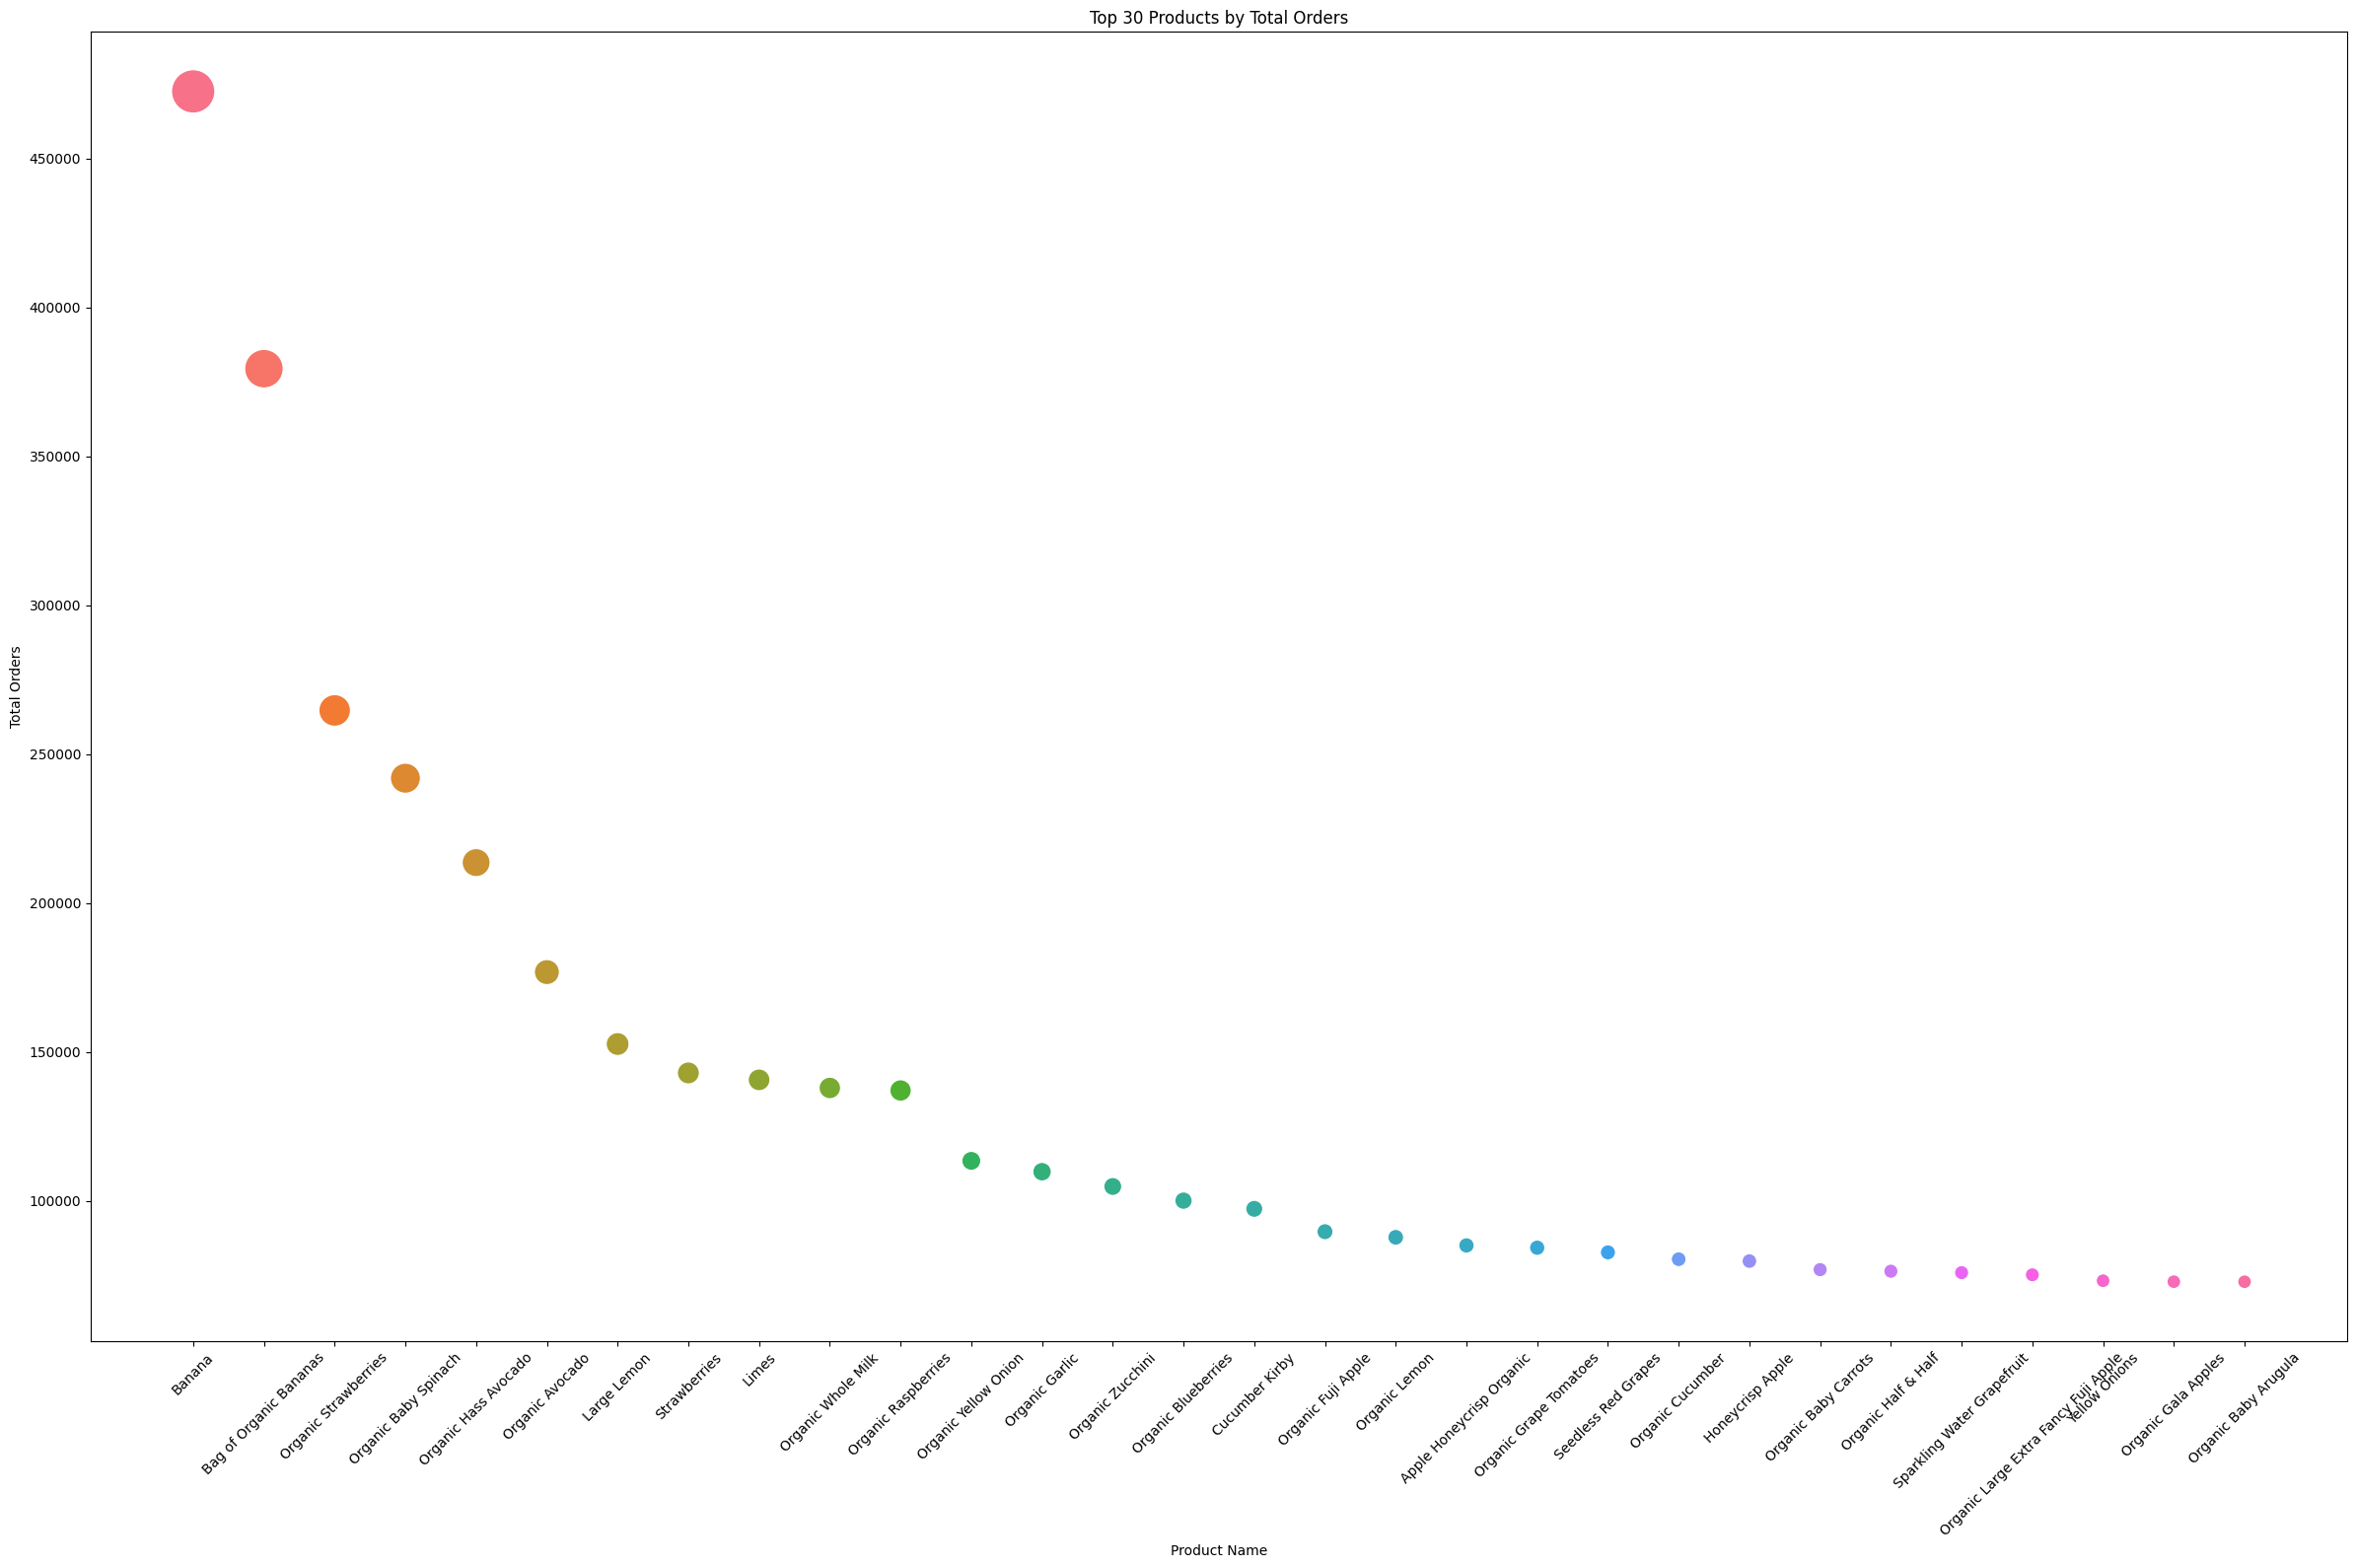

In [32]:
order_volume = order_products_prior_df.groupby('product_name')['product_id'].count().reset_index(name='total_orders')

# 판매량 상위 30개 선택해서 merge
top_30_products = order_volume.nlargest(30, 'total_orders')
top_30_products_info = pd.merge(top_30_products, products_df, on='product_name', how='left')

#시각화
palette = sns.color_palette("husl", len(top_30_products))
plt.figure(figsize=(24,16))
sns.scatterplot(data=top_30_products_info, x='product_name', y='total_orders', hue='product_name', 
                palette=palette, size='total_orders', sizes=(100, 1000), legend=None)

plt.title('Top 30 Products by Total Orders')
plt.xticks(rotation=45)
plt.xlabel('Product Name')
plt.ylabel('Total Orders')
plt.tight_layout()
plt.show()

* 상위 30개의 제품을 총 주문량에 따라 시각화
* X축은 총 주문량, Y축은 제품 이름을 표시
* xticks(rotation=45)이용하여 x축의 제품명이 서로 겹치지 않도록 조정

* **점 크기**: 각 점의 크기는 제품의 총 주문량에 비례
* **점 색상**: 각 제품에 대해 다른 색상을 사용하여 시각적으로 구분